#<b>Milestone 1

##<b>Problem Definition</b>
**The context:** Why is this problem important to solve?<br>
**The objectives:** What is the intended goal?<br>
**The key questions:** What are the key questions that need to be answered?<br>
**The problem formulation:** What is it that we are trying to solve using data science?

## <b>Data Description </b>

There are a total of 24,958 train and 2,600 test images (colored) that we have taken from microscopic images. These images are of the following categories:<br>


**Parasitized:** The parasitized cells contain the Plasmodium parasite which causes malaria<br>
**Uninfected:** The uninfected cells are free of the Plasmodium parasites<br>


## <b>Important Notes</b>

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook would give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise. 

- In the notebook, there are markdowns cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they want to explore different techniques. 

###<b> Mounting the Drive

In [46]:
#Mounting the drive
#from google.colab import drive
#drive.mount('/content/drive')

### <b>Loading libraries</b>

In [47]:
#Importing libraries required to load the data

#import zipfile #photos unzipped
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, LeakyReLU, GlobalAvgPool2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

### <b>Let us load the data</b>

**Note:** 
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [48]:
#Storing the path of the data file from the Google drive
#path = '/content/drive/MyDrive/CNN Project Malaria Detection /cell_images.zip'

#The data is provided as a zip file so we need to extract the files from the zip file
#with zipfile.ZipFile(path, 'r') as zip_ref:
#    zip_ref.extractall()

The files have been extracted to the local session of Google Colab. The extracted folder would have the following structure:

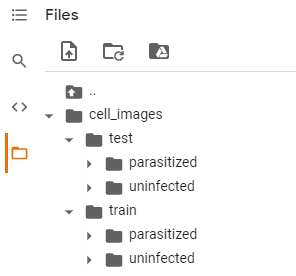

The extracted folder has different folders for train and test data which further contains the different sizes of images for parasitized and uninfected cells within the respective folder name. 

The size of all images must be the same and should be converted to 4D arrays so that they can be used as an input for the convolutional neural network. Also, we need to create the labels for both types of images to be able to train and test the model. 

Let's do the same for the training data first and then we will use the same code for the test data as well.

In [49]:
#Storing the path of the extracted "train" folder 
#train_dir = '/content/cell_images/train'
train_dir = 'g:/my drive/Colab Notebooks/cell_images/train'

#Size of image so that each image has the same size
SIZE = 64

#Empty list to store the training images after they are converted to NumPy arrays
train_images = []

#Empty list to store the training labels (0 - uninfected, 1 - parasitized)
train_labels = []

In [50]:
#We will run the same code for "parasitized" as well as "uninfected" folders within the "train" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    #Path of the folder
    images_path = os.listdir(train_dir + folder_name)

    for i, image_name in enumerate(images_path):
        try:
            #Opening each image using the path of that image
            image = Image.open(train_dir + folder_name + image_name)

            #Resizing each image to (224,224)
            image = image.resize((SIZE, SIZE))

            #Converting images to arrays and appending that array to the empty list defined above
            train_images.append(np.array(image))

            #Creating labels for parasitized and uninfected images
            if folder_name=='/parasitized/':
                train_labels.append(1)
            else:
                train_labels.append(0)
        except Exception:
            pass       

#Converting lists to arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [51]:
#Storing the path of the extracted "test" folder 
test_dir = '/content/cell_images/test'
test_dir = 'g:/my drive/Colab Notebooks/cell_images/test'
#Size of image so that each image has the same size (it must be same as the train image size)
SIZE = 64

#Empty list to store the testing images after they are converted to NumPy arrays
test_images = []

#Empty list to store the testing labels (0 - uninfected, 1 - parasitized)
test_labels = []

In [52]:
#We will run the same code for "parasitized" as well as "uninfected" folders within the "test" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    #Path of the folder
    images_path = os.listdir(test_dir + folder_name)

    for i, image_name in enumerate(images_path):
        try:
            #Opening each image using the path of that image
            image = Image.open(test_dir + folder_name + image_name)
            
            #Resizing each image to (128,128)
            image = image.resize((SIZE, SIZE))
            
            #Converting images to arrays and appending that array to the empty list defined above
            test_images.append(np.array(image))
            
            #Creating labels for parasitized and uninfected images
            if folder_name=='/parasitized/':
                test_labels.append(1)
            else:
                test_labels.append(0)
        except Exception:
            pass       

#Converting lists to arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

###<b> Checking the shape of train and test images

In [53]:
# shape of images
print(train_images.shape)
print(test_images.shape)


(24958, 64, 64, 3)
(2600, 64, 64, 3)


###<b> Checking the shape of train and test labels

In [54]:
# shape of labels 
print(train_labels.shape)
print(test_labels.shape)

(24958,)
(2600,)


#####<b> Observations and insights: _____

    -We created train_images, train_labels, test_images, test_labels, images are RGB, and of a size of 64 by 64
    -We have 24958 samples to train and  2600 sample to test 
    


### <b>Check the minimum and maximum range of pixel values for train and test images

In [55]:
# try to use min and max function from numpy
print(train_images.max() , test_images.max())

255 255


#####<b> Observations and insights: _____

    The maximum size of the training and testing images is 255, we must reduce the size

###<b> Count the number of values in both uninfected and parasitized 

In [56]:
# try to use value_counts to count the values
print(pd.DataFrame(test_labels).value_counts())
print(pd.DataFrame(train_labels).value_counts())


0    1300
1    1300
dtype: int64
0    12479
1    12479
dtype: int64


###<b>Normalize the images

In [57]:
# try to normalize the train and test images by dividing it by 255 and convert them to float32 using astype function
train_images = (train_images/255).astype('float32')
test_images = (test_images/255).astype('float32')

#####<b> Observations and insights: _____
    
    We have the same number of images for both parasitized and not-infected cells in both of the training and testing databasets, and the dataset is not normalized 

###<b> Plot to check if the data is balanced

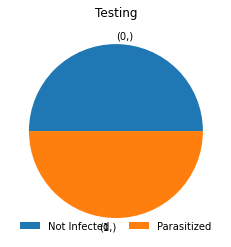

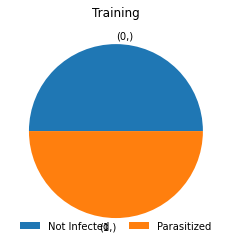

In [58]:
# you are free to use bar plot or pie-plot or count plot, etc. to plot the labels of train and test data and check if they are balanced
tst = pd.DataFrame(test_labels).value_counts()
trn = pd.DataFrame(train_labels).value_counts()

lables =   ['Not Infected','Parasitized']
plt.figure() 
tst.plot.pie(title="Testing" )
plt.legend (lables,frameon=False , loc='lower center',ncol=2)
plt.ylabel('')

plt.figure() 
trn.plot.pie(title="Training")
plt.legend (lables,frameon=False , loc='lower center',ncol=2)
plt.ylabel('')
plt.show()


#####<b> Observations and insights: _____
    
    Both training and testing data are balanced in terms of the number of classes( Parasitized / un-infected), testing has 1300 x 1300 and  training has 12479 x 12479
    

### <b>Data Exploration</b>
Let's visualize the images from the train data

In [59]:
#Experementing removing channels form a picture
def rgbChannel(img , channel='0'):
    if channel == '0':
        return img
    elif channel == 'r':
        imgR = img
        imgR[:, :, 1] = 0
        imgR[:, :, 2] = 0
        return imgR
    elif channel == 'g':
        imgR = img
        imgR[:, :, 0] = 0
        imgR[:, :, 2] = 0
        return imgR
    elif channel == 'b':
        imgR = img
        imgR[:, :, 0] = 0
        imgR[:, :, 1] = 0
        return imgR    
    

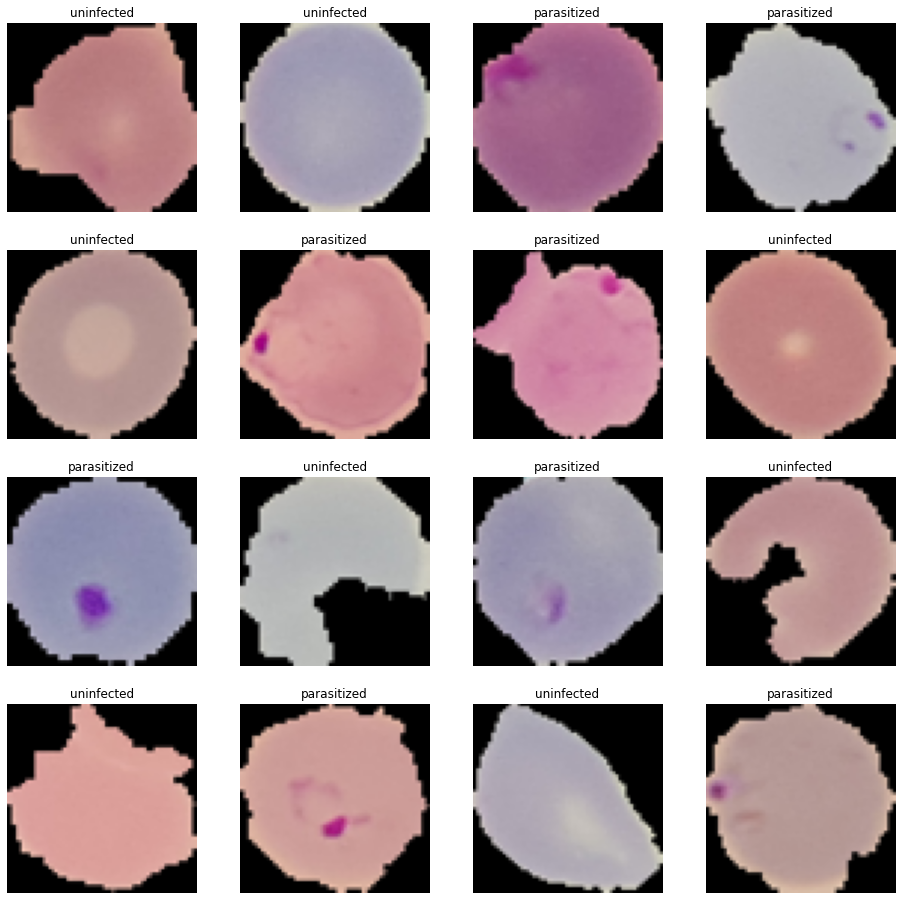

In [60]:
# This code will help you in visualizing both the parasitized and uninfected images
np.random.seed(42)
plt.figure(1 , figsize = (16 , 16))

for n in range(1, 17):
    plt.subplot(4, 4, n)
    index = int(np.random.randint(0, train_images.shape[0], 1))
    if train_labels[index] == 1: 
        plt.title('parasitized')
    else:
        plt.title('uninfected')
    plt.imshow(rgbChannel(train_images[index],'0'))
    #plt.imshow(train_images[index])
    plt.axis('off')

#####<b> Observations and insights: _____
    
    Based on the imgaes above, we can see a clear difference between the parasitized and non-infected cells, 

###<b> Similarly visualize the images with subplot(6,6) and figsize=(12,12)

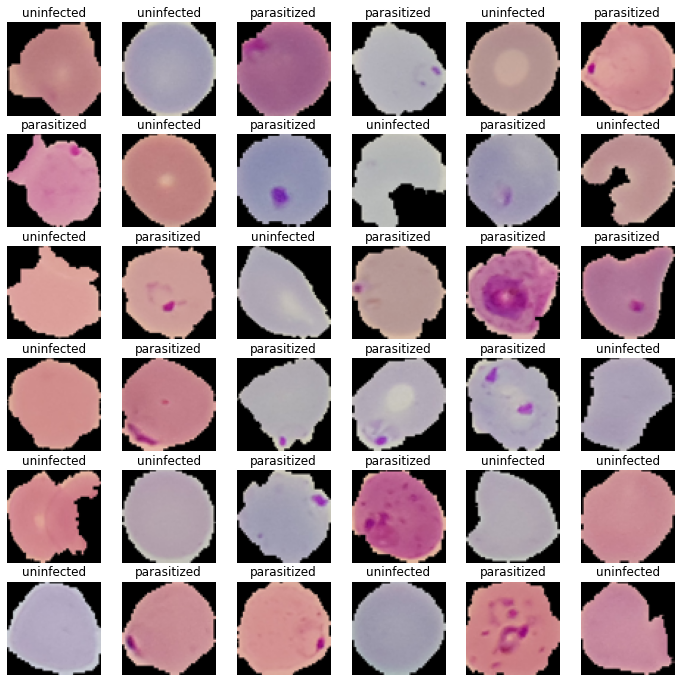

In [61]:
# Hint: Have a keen look into the number of iterations that the for loop should iterate
np.random.seed(42)
plt.figure(1 , figsize = (12 , 12))

for n in range(1, 37):
    plt.subplot(6, 6, n)
    index = int(np.random.randint(0, train_images.shape[0], 1))
    if train_labels[index] == 1: 
        plt.title('parasitized')
    else:
        plt.title('uninfected')
    plt.imshow(rgbChannel(train_images[index],'0'))
    #plt.imshow(train_images[index])
    plt.axis('off')


#####<b>Observations and insights:
    
    The differance between un-infected and parasitized cells can be identified visually by the reddish apatial pattern in the parasitized cells, the convolutional neural network will be able to learn then identified these spots
    I will also use pooling for optimization
    dropout layers to avoid overfitting
    Convolution layers can find out this pattern, providing this to a NN (dense) we will be able to classify a new sell

###<b> Plotting the mean images for parasitized and uninfected

In [62]:
# function to find the mean
def find_mean_img(full_mat, title):
    # calculate the average
    mean_img = np.mean(full_mat, axis = 0)[0]
    # reshape it back to a matrix
    plt.imshow(mean_img)
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()
    return mean_img

<b> Mean image for parasitized

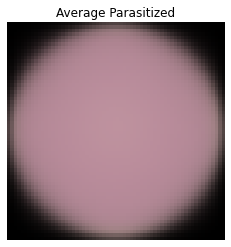

In [63]:
# If the label=1 then the image is parasitised and if the label=0 then the image is uninfected
parasitized_data=[]                                # Create a list to store the parasitized data
for img, label in zip(train_images, train_labels):
        if label==1:
              parasitized_data.append([img])          

parasitized_mean = find_mean_img(np.array(parasitized_data), 'Parasitized')   # find the mean


<b> Mean image for uninfected

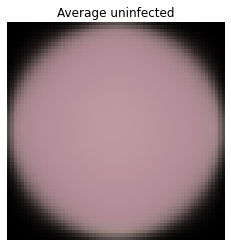

In [64]:
# Similarly write the code to find the mean image of uninfected
uninfected_data=[]                                # Create a list to store the parasitized data
for img, label in zip(train_images, train_labels):
        if label==0:
              parasitized_data.append([img])          

parasitized_mean = find_mean_img(np.array(parasitized_data), 'uninfected')   # find the mean



#####<b> Observations and insights: _____
    
    
 By visualizing the mean of all of the infected and un-infecetd images we make sure that the distribution is normalized and centerd around the middle of the image

### <b>Converting RGB to HSV of Images using OpenCV

####<b> Converting the train data

In [65]:
import cv2
gfx=[]   # to hold the HSV image array
for i in np.arange(0,100,1):
  a=cv2.cvtColor(train_images[i],cv2.COLOR_BGR2HSV)
  gfx.append(a)
gfx=np.array(gfx)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


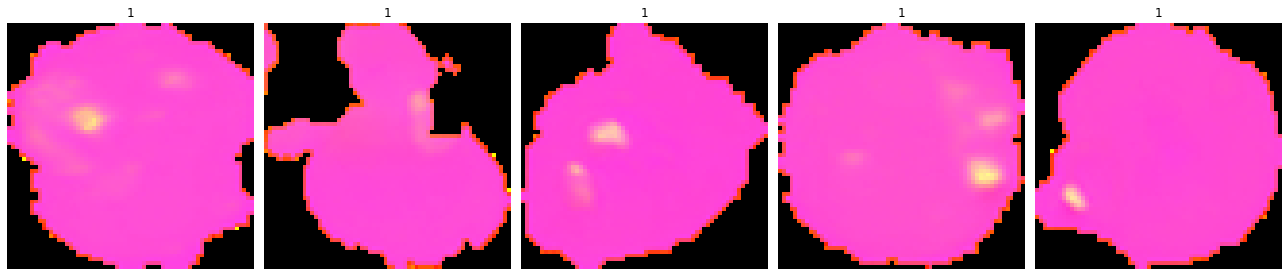

In [66]:
viewimage=np.random.randint(1,100,5)
fig,ax=plt.subplots(1,5,figsize=(18,18))
for t,i in zip(range(5),viewimage):
  Title=train_labels[i]
  ax[t].set_title(Title)
  ax[t].imshow(gfx[i])
  ax[t].set_axis_off()
  fig.tight_layout()


####<b> Converting the test data

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


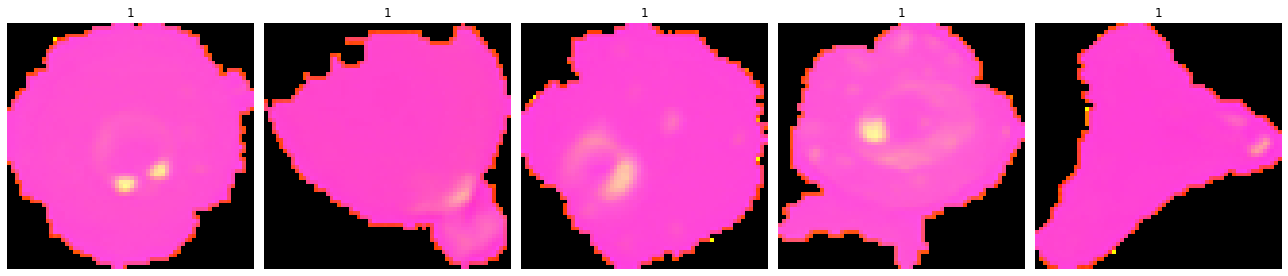

In [67]:
gfx=[]   # to hold the HSV image array
for i in np.arange(0,100,1):
  a=cv2.cvtColor(test_images[i],cv2.COLOR_BGR2HSV)
  gfx.append(a)
gfx=np.array(gfx)

viewimage=np.random.randint(1,100,5)
fig,ax=plt.subplots(1,5,figsize=(18,18))
for t,i in zip(range(5),viewimage):
  Title=test_labels[i]
  ax[t].set_title(Title)
  ax[t].imshow(gfx[i])
  ax[t].set_axis_off()
  fig.tight_layout()

#####<b>Observations and insights: _____
    
    Converting the images to  HSV Hue Saturation Value will help in detecting objects in the image
    
    

###<b> Processing Images using Gaussian Blurring

####<b> Gaussian Blurring on train data

In [23]:
gbx=[]  ## to hold the blurred images
for i in np.arange(0,100,1):
  b= cv2.GaussianBlur(train_images[i], (5, 5), 0)
  gbx.append(b)
gbx=np.array(gbx)

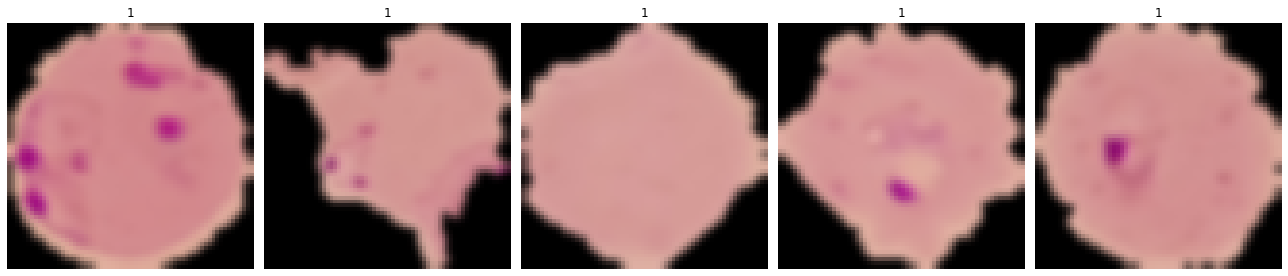

In [24]:
viewimage=np.random.randint(1,100,5)
fig,ax=plt.subplots(1,5,figsize=(18,18))
for t,i in zip(range(5),viewimage):
  Title=train_labels[i]
  ax[t].set_title(Title)
  ax[t].imshow(gbx[i])
  ax[t].set_axis_off()
  fig.tight_layout()

####<b> Gaussian Blurring on test data

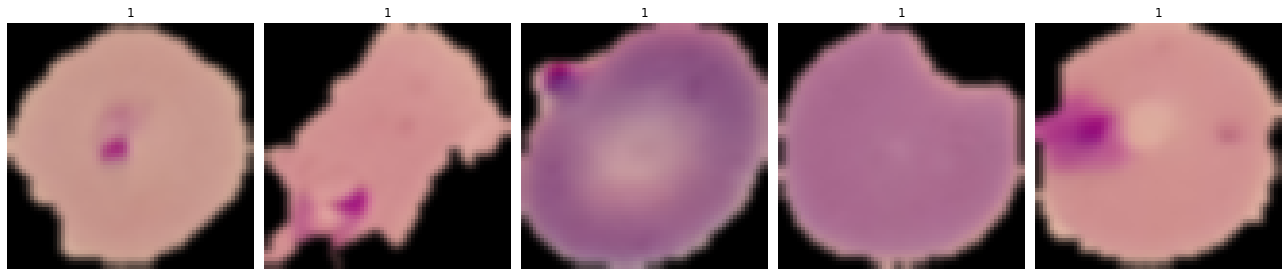

In [25]:
gbx=[] 
for i in np.arange(0,100,1):
  b= cv2.GaussianBlur(test_images[i], (5, 5), 0)
  gbx.append(b)
gbx=np.array(gbx)


viewimage=np.random.randint(1,100,5)
fig,ax=plt.subplots(1,5,figsize=(18,18))
for t,i in zip(range(5),viewimage):
  Title=test_labels[i]
  ax[t].set_title(Title)
  ax[t].imshow(gbx[i])
  ax[t].set_axis_off()
  fig.tight_layout()

#####**Observations and insights: _____**

Do you think that blurring would help us for this problem statement in any way?

Gaussian Bluring will help the kernal to identify edges better as it pixalizes the image and minimizes the noize 


## **Proposed approach**

**Potential techniques:** What different techniques should be explored?<br>
**Overall solution design:** What is the potential solution design?<br>
**Measures of success:** What are the key measures of success?<br>

Now that we know the our data, we did some feature engineering by normalized the images in terms of size pixel values, we centered value (mean) and  blurred images to improve parasite visibility.

We are ready to plug this dataset to a convolutional nural network which will help to classify new images into parasitzed or not infected.

**Potential techniques**: we will try several sequencial convolutional NN with differnet depthes, adding maxpooling to reduce dimensionality and dropout to avoid overfitting

**Overall Solution design**: after training the NN I will re-use the trained model on the testing data, and build the confusion matrix. once this is done i will try to deploy the model so it can classify new cell pictures.

**Measures of success**: the solution should perform well, we should have above 90 percent accuracy in TP and TN
